In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas
import seaborn as sn
from astropy.io import ascii
import astropy.constants as c
import astropy.units as u
from exoatlas import *

TypeError: expected str, bytes or os.PathLike object, not NoneType

In [23]:
solar_system = ascii.read('SolarSys_data.dat')
all_planets = pandas.read_csv('planets_2019.10.10_14.49.02.tab',comment='#',sep='\t')
candidates = pandas.read_csv('toi-plus-2019-10-09.csv')
params = pandas.read_csv('TESS_Objects.csv',comment='#')

In [24]:
tic_id = candidates['tic_id']
TOI = candidates['toi_id']
Tmag = np.array(candidates['Tmag'])
Period = np.array(candidates['Period'])
dPeriod = np.array(candidates['Period Err'])
R_s = np.array(candidates['R_s'])
dR_s = np.array(candidates['R_s Err'])
R_p = np.array(candidates['R_p'])
dR_p = np.array(candidates['R_p Err'])
Insolation = np.array(candidates['Insol_p'])
T_eq = np.array(candidates['T_eq'])
T_eff = np.array(candidates['T_eff'])
Depth = np.array(candidates['Transit Depth'])/1000

In [25]:
tic_id_sample = params['TIC ID']
TOI_sample = params['TOI']
Tmag_sample = np.array(params['Tmag'])
Period_sample = np.array(params['P (days)'] )# must be in days
dPeriod_sample = np.array(params['dP']) # must be in days
R_s_sample = np.array(params['R_s'])
dR_s_sample = np.array(params['dR_s'])
R_p_sample = np.array(params['R_E']) # Earth radii
dR_p_sample = np.array(params['dRe'])
Insolation_sample = np.array(params['Insol'])
T_eq_sample = np.array(params['T_eq'])
T_eff_sample = np.array(params['T_eff'])
Depth_sample = np.array(params['Depth'])/1000 #ppt

have_data = params['Data']
no_data = params['no_data']

In [26]:
Rp_all = all_planets['pl_rade']
tstar = all_planets['st_teff']
axis = all_planets['pl_ratdor']
vesc_all = np.sqrt(2*c.G*(all_planets['pl_masse']*c.M_earth)/(Rp_all*c.R_earth))
vtherm_all = np.sqrt(3*(c.k_B*all_planets['pl_eqt']*u.K/c.m_p))
vesc_vtherm_all = vesc_all/vtherm_all

S = (tstar/5778)**4*(215/axis)**2

In [27]:
ss_names = solar_system['Planet']
ss_vesc = solar_system['Vesc']
ss_vtherm = solar_system['Vtherm']
ss_insol = solar_system['Insolation']
ss_re = solar_system['R_earth']

In [72]:
def TESS_Pop_plots(x, y, x_sample, y_sample,
                   xs_err,ys_err,
                   Title=None,
                   xlabel=None,
                   ylabel=None,
                   vmin=None,
                   vmax=None,
                   xlim=None,
                   ylim=None,    
                   xscale = 'linear',
                   yscale = 'linear',
                   figname='You didnt give me a name.pdf'):
    
    if ylim == None:
        ylim =[np.nanmin(y),np.nanmax(y)]
    if xlim == None:
        xlim =[np.nanmin(x),np.nanmax(x)]
    
    fig, ax1 = plt.subplots(figsize=(6,6), nrows=1, ncols=1)
    
    ax1.scatter(x, y, alpha=0.7, color='black',
                zorder=-100, label='TOIs',s=5)

    ax1.scatter(S, Rp_all, alpha = 0.7 ,color = 'gray',
                zorder=-500, label='All Confirmed Planets',s=5)
    ax1.errorbar(11.8,2.612,yerr=0.11,fmt='o',alpha=0.9,
                zorder=500,label='TOI 122',markersize=10,
                color='darkred')
    ax1.errorbar(3.2,1.462,yerr=0.05,fmt='o',alpha=0.9,
                zorder=500, label='TOI 237',markersize=10,
                color='royalblue')
    ax1.scatter(x_sample, y_sample, alpha=0.7, color = 'teal',
                label='M Dwarf Sample',
                s=10)
#     ax1.errorbar(x_sample[have_data], y_sample[have_data],
#                  xerr = xs_err[have_data],
#                  yerr = ys_err[have_data],
#                  alpha=0.7,color = 'royalblue',
#                  label='Have LCO Data',fmt='o',markersize=8,
#                  zorder=100)

#     ax1.scatter(vesc_all/vtherm_all, Rp_all, alpha = 0.7 ,color = 'gray',
#                 zorder=-500, label='All Confirmed Planets',s=5)
#     ax1.errorbar((18748/3585),2.612,yerr=0.11,fmt='o',color='royalblue',alpha=0.9,
#                 zorder=500,label='TOI 122',markersize=10)
#     ax1.errorbar((15301/3048),1.462,yerr=0.05,fmt='o',color='darkred',alpha=0.9,
#                 zorder=500,label='TOI 237',markersize=10)
    
    for i in range(len(ss_names)):
        ax1.scatter(ss_insol[i],ss_re[i],
                    zorder=10,s=15)
        ax1.annotate(ss_names[i], (ss_insol[i], ss_re[i]*1.1))
#         ax1.scatter(ss_vesc[i]/ss_vtherm[i],ss_re[i],
#                    zorder=10,s=15)
#         ax1.annotate(ss_names[i], (ss_vesc[i]/ss_vtherm[i], ss_re[i]*1.1))

    ax1.axvspan(0.32,1.78,alpha=0.4,color='green',label='Optimistic HZ')

    ax1.set_ylabel(ylabel, fontsize=16)
    ax1.set_xlabel(xlabel,fontsize=16)
    ax1.set_title(Title,fontsize=17)
    ax1.set_ylim(ylim[0],ylim[1])
    ax1.set_xlim(xlim[0],xlim[1])
    ax1.legend(loc='lower right')
    ax1.set_yscale(yscale)
    ax1.set_xscale(xscale)

    plt.tight_layout()
    plt.savefig(figname)
    plt.show()

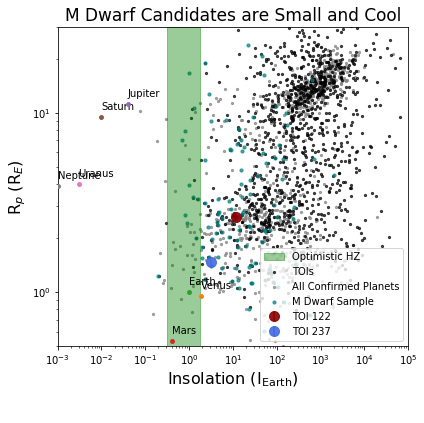

In [73]:
TESS_Pop_plots(y = R_p,
               x = Insolation,
               y_sample = R_p_sample,
               x_sample = Insolation_sample,
               ys_err = dR_p_sample,
               xs_err = 0.3*Insolation_sample,
               Title = 'M Dwarf Candidates are Small and Cool',
               ylabel = r'R$_p$ (R$_{E}$)',
               xlabel = r'Insolation (I$_{\rm{Earth}}$)',
               vmin = 8.5,
               vmax = 11,
               xscale = 'log',
               yscale = 'log',
               ylim=[0.5,30],
               xlim = [0.001, 1e5],
               figname='TOIs_Rp_Insol_5.pdf')

#ax1.axvspan(0.32,1.78,alpha=0.4,color='green',label='Optimistic HZ')

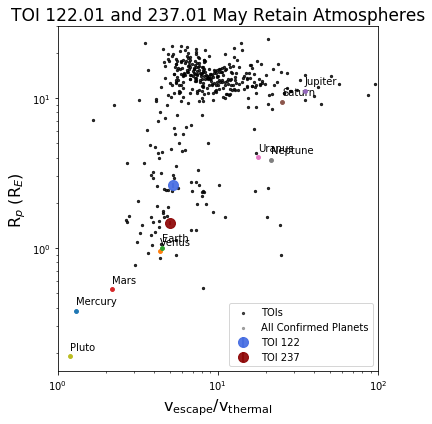

In [69]:
TESS_Pop_plots(y = Rp_all,
               x = vesc_all/vtherm_all,
               y_sample = 0,
               x_sample = 0,
               ys_err = 0,
               xs_err = 0,
               Title = 'TOI 122.01 and 237.01 May Retain Atmospheres',
               ylabel = r'R$_p$ (R$_{E}$)',
               xlabel = r'v$_{\rm{escape}}$/v$_{\rm{thermal}}$',
               xscale = 'log',
               yscale = 'log',
               ylim=[0.15,30],
               xlim = [1, 1e2],
               figname='TOIs_vesc_vtherm.pdf')

In [ ]:
# TESS_Pop_plots(x = R_s,
#                y = Tmag,
#                x_sample = R_s_sample,
#                y_sample = Tmag_sample,
#                cbar = T_eff,
#                cbar_sample = T_eff_sample,
#                xs_err = dR_s_sample,
#                ys_err = np.zeros(shape=len(Tmag_sample)),
#                Title = 'M Dwarf Candidates Tend to be Faint',
#                xlabel = r'R$_s$ (R$_{\odot}$)',
#                ylabel = 'Tmag',
#                cbar_label = r'T$_{\rm{eff}}$',
#                vmin = 2400,
#                vmax = 4000,
#                yscale = 'linear',
#                xscale = 'log',
#                #xlim=[0.5,40],
#                cmap="coolwarm_r",
#                figname='TOIs_Rs_Tmag.pdf')

#ax1.axhspan(ylim[0],11,alpha=0.3,color='orange',label='Bright enough for RV')

In [ ]:
# TESS_Pop_plots(y = Tmag,
#                x = Depth,
#                x_sample = Depth_sample,
#                y_sample = Tmag_sample,
#                cbar = R_p,
#                cbar_sample = R_p_sample,
#                xs_err = np.zeros(shape=len(Tmag_sample)),
#                ys_err = np.zeros(shape=len(Tmag_sample)),
#                Title = 'Ground-based Followup Useful for Faint Targets',
#                xlabel = 'Depth (ppt)',
#                ylabel = 'Tmag',
#                cbar_label = r'R$_p$ (R$_{E}$)',
#                vmin = 1,
#                vmax = 10,
#                xscale = 'log',
#                #yscale = 'log',
#                xlim=[0.01,1e3],
#                cmap="plasma",
#                figname='TOIs_depth_tmag.pdf')

#ax1.axvspan(xlim[0],1,alpha=0.3,color='purple',label='Hard to detect this depth)

In [ ]:
# TESS_Pop_plots(y = R_p,
#                x = Period,
#                y_sample = R_p_sample,
#                x_sample = Period_sample,
#                cbar = Tmag,
#                cbar_sample = Tmag_sample,
#                ys_err = dR_p_sample,
#                xs_err = dPeriod_sample,
#                Title = 'Many Large M Dwarf Candidates',
#                ylabel = r'R$_p$ (R$_{E}$)',
#                xlabel = 'Orbital Period (d)',
#                cbar_label = 'Tmag',
#                vmin = 8.5,
#                vmax = 11,
#                xscale = 'log',
#                yscale = 'log',
#                ylim=[0.5,40],
#                cmap="cividis",
#                figname='TOIs_Rp_Per.pdf')

#ax1.axhspan(0,1.25,alpha=0.6,color='pink',label='Rp<1.25R$_{E}$')